In [1]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
# Read in datasets
df_em = pd.read_csv('Emissions by Country.csv')
df_po = pd.read_csv('Population by Country.csv')

In [3]:
# Get percent world emissions for 2017
df_em_2017 = df_em[['country_name', '2017']].rename(columns={'2017': 'emissions'}).set_index('country_name')

total_em_2017 = df_em_2017.at['GLOBAL TOTAL', 'emissions']
df_em_2017['percent_emissions'] = (df_em_2017['emissions'] / total_em_2017) * 100

df_em_2017 = df_em_2017.drop(['GLOBAL TOTAL'], axis=0)
del df_em_2017.index.name

In [4]:
# Get percent world population for 2017
cols = ['Country Name', '2017', 'Country Code']
df_po_2017 = df_po[cols].rename(columns={'2017': 'population', 'Country Code': 'code'}).set_index('Country Name')

total_po_2017 = df_po_2017.at['World', 'population']
df_po_2017['percent_population'] = (df_po_2017['population'] / total_po_2017) * 100

df_po_2017 = df_po_2017.drop(['World'], axis=0)
del df_po_2017.index.name

In [5]:
# Get codes for emissions data
rename = {'Bahamas, The': 'Bahamas', 'Brunei Darussalam': 'Brunei', 'Cabo Verde': 'Cape Verde', 'Congo':
          'Republic of the Congo', 'Congo, Rep.': 'Republic of the Congo', 'Côte d’Ivoire': "Cote d'Ivoire",
          'Curaçao': 'Curacao', 'Czech Republic': 'Czechia', 'Congo, Dem. Rep.': 'Democratic Republic of the Congo',
          'Egypt, Arab Rep.': 'Egypt', 'Faroes': 'Faroe Islands', 'former Yugoslav Republic of Macedonia, the':
          'North Macedonia', 'France and Monaco': 'France', 'Hong Kong SAR, China': 'Hong Kong', 'Lao PDR': 'Laos',
          'Iran, Islamic Rep.': 'Iran', 'Israel and Palestine, State of': 'Israel', 'Kyrgyz Republic': 'Kyrgyzstan',
          'Italy, San Marino and the Holy See': 'Italy', 'Macao SAR, China': 'Macao', 'Myanmar/Burma': 'Myanmar',
          'Korea, Dem. People’s Rep.': 'North Korea', 'Russian Federation': 'Russia', 'St. Kitts and Nevis':
          'Saint Kitts and Nevis', 'St. Lucia': 'Saint Lucia', 'São Tomé and Príncipe': 'Sao Tome and Principe',
          'St. Vincent and the Grenadines': 'Saint Vincent and the Grenadines', 'Serbia and Montenegro': 'Serbia',
          'Slovak Republic': 'Slovakia', 'Korea, Rep.': 'South Korea', 'Spain and Andorra': 'Spain', 'Swaziland':
          'Eswatini', 'Sudan and South Sudan': 'Sudan', 'Switzerland and Liechtenstein': 'Switzerland', 'Gambia, The':
          'The Gambia', 'Syrian Arab Republic': 'Syria', 'Venezuela, RB': 'Venezuela', 'Yemen, Rep.': 'Yemen'}
   
df_em_2017['country'] = df_em_2017.index.to_series().replace(rename)
df_po_2017['country'] = df_po_2017.index.to_series().replace(rename)

df_em_2017_codes = df_em_2017.merge(df_po_2017[['country', 'code']], how='left', on='country')
df_em_2017_codes = df_em_2017_codes.dropna(subset=['code'])

In [6]:
# Recalculate select values for population data
df_po_2017_adj = df_po_2017.drop(['country'], axis=1)
pop = 'population'

df_po_2017_adj.at['France', pop] = df_po_2017.at['France', pop] + df_po_2017.at['Monaco', pop]
df_po_2017_adj.at['Italy', pop] = df_po_2017.at['Italy', pop] + df_po_2017.at['San Marino', pop]
df_po_2017_adj.at['Serbia', pop] = df_po_2017.at['Serbia', pop] + df_po_2017.at['Montenegro', pop]
df_po_2017_adj.at['Spain', pop] = df_po_2017.at['Spain', pop] + df_po_2017.at['Andorra', pop]
df_po_2017_adj.at['Sudan', pop] = df_po_2017.at['Sudan', pop] + df_po_2017.at['South Sudan', pop]
df_po_2017_adj.at['Switzerland', pop] = df_po_2017.at['Switzerland', pop] + df_po_2017.at['Liechtenstein', pop]

In [7]:
# Recalculate population percentages
df_po_2017_adj['percent_population'] = (df_po_2017_adj['population'] / total_po_2017) * 100

In [8]:
# Merge percent world emissions and percent world population
df = df_em_2017_codes[['country', 'code', 'percent_emissions']].merge(df_po_2017_adj[['code', 'percent_population']])

In [9]:
# Create new column for 'score' and 'rounded_score'
df['score'] = df['percent_emissions'] / df['percent_population']
df['rounded_score'] = round(df['score'], 0)

In [10]:
# Export data
df.to_csv('Disproportionate Emisions.csv', index=False)

Text(0, 0.5, 'Ratio of Emissions Contributions to Share of World Population')

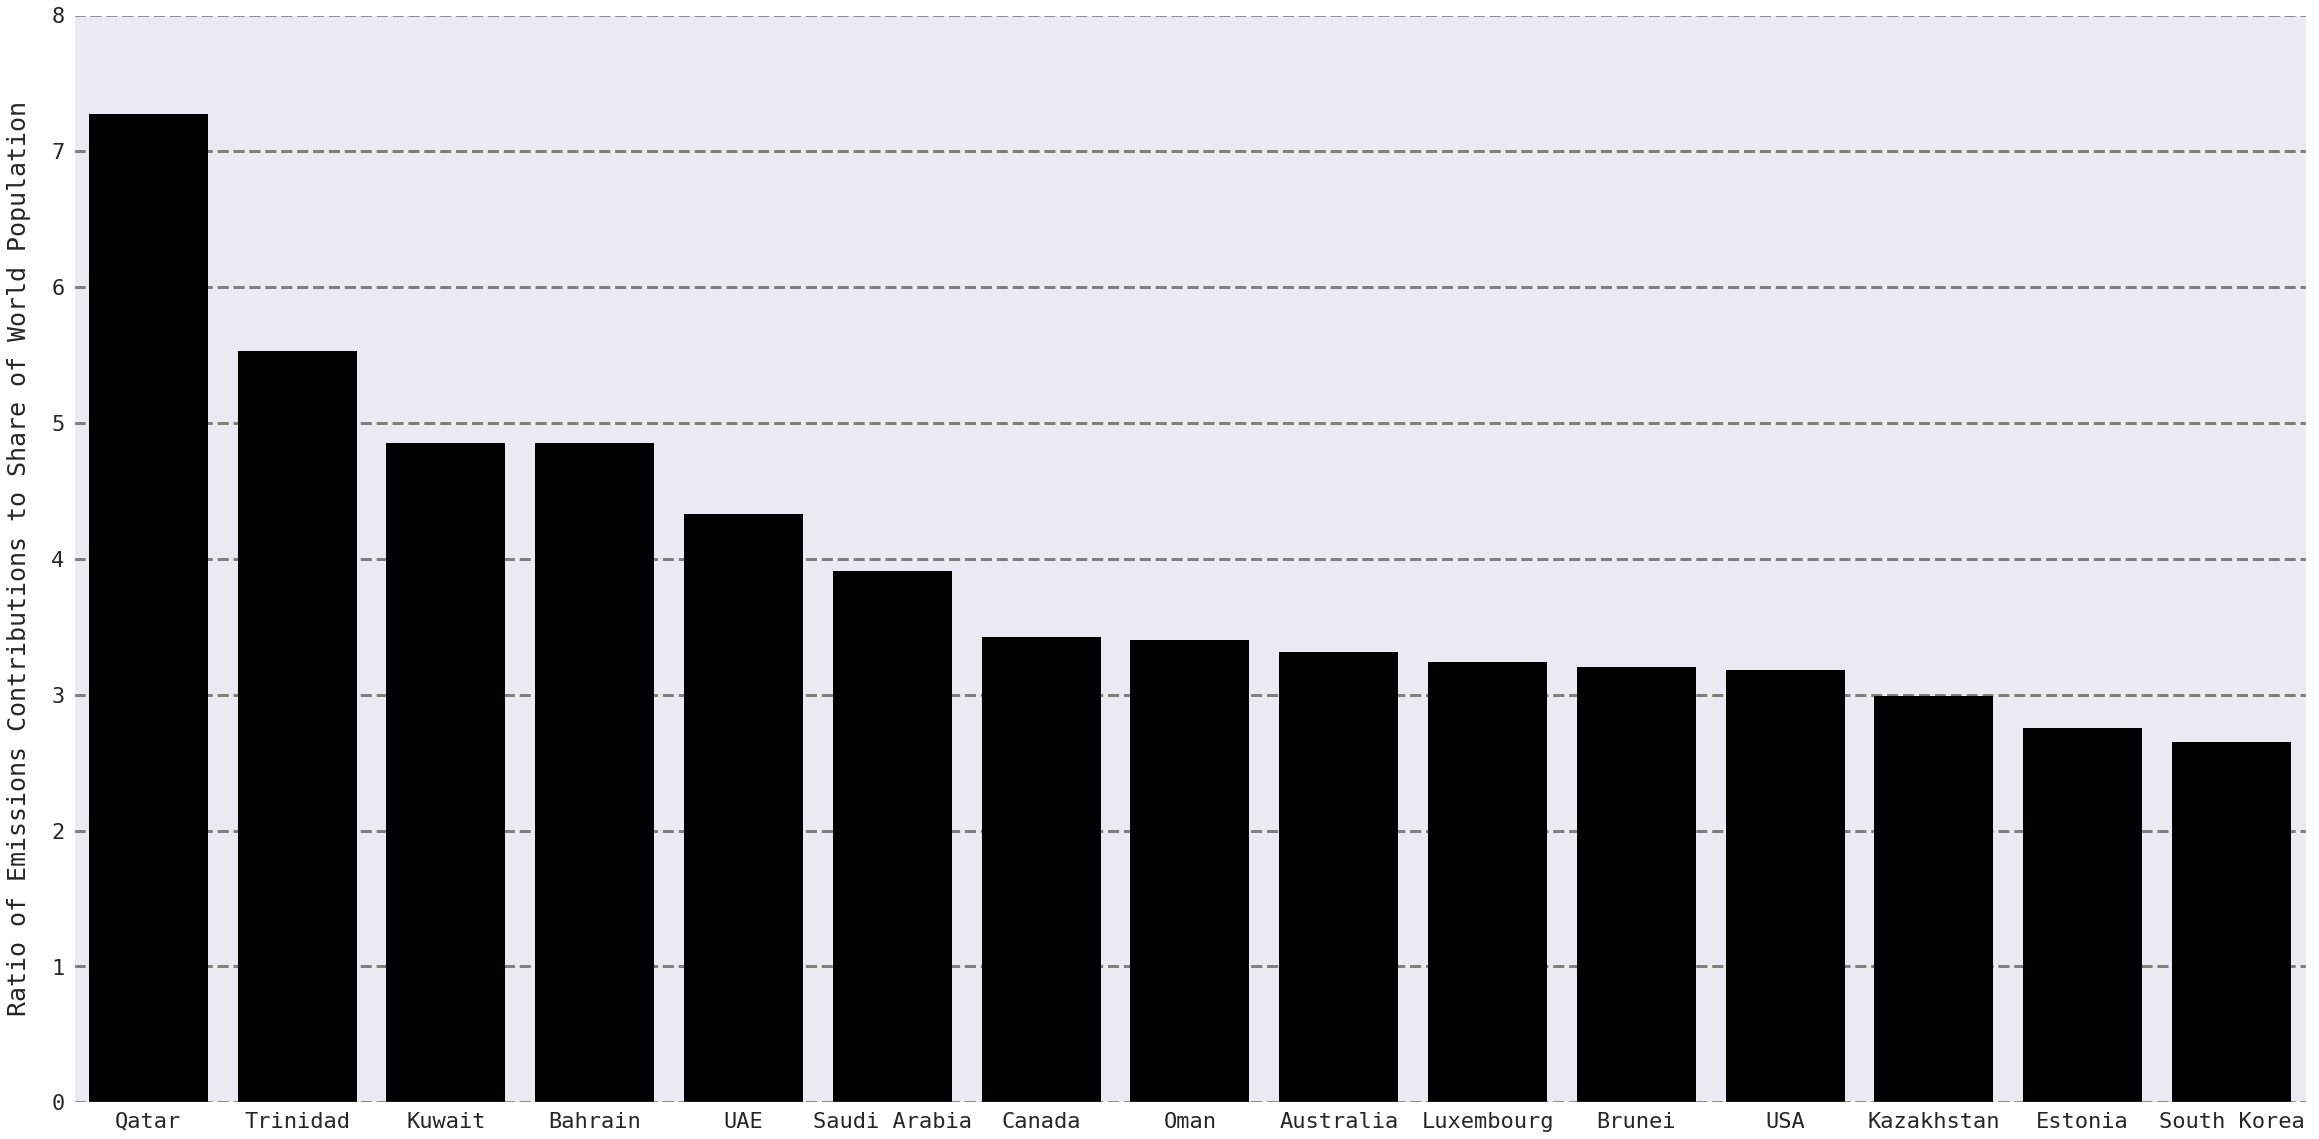

In [12]:
# Visualize top 10 worst
not_countries = ['Curacao', 'New Caledonia', 'Gibraltar', 'Palau']
worst = df.sort_values(by='score', ascending=False).set_index('country').drop(not_countries).head(15).reset_index()
names = {'United Arab Emirates': 'UAE', 'Trinidad and Tobago': 'Trinidad', 'United States': 'USA'}
worst['country'] = worst['country'].replace(names)
plt.figure(figsize=(40, 20))
plt.tight_layout()
color = ['black']

plt.grid(color='gray', linestyle='--', linewidth=3)

plot = sns.barplot(x='country', y='score', data=worst, palette=color)
plt.ylim(0,8)
plt.setp(plot.patches, linewidth=0)

sns.set(style='darkgrid', font='monospace')
sns.set_context("notebook", font_scale=4, rc={"lines.linewidth": 5})
plt.xlabel('')
plt.ylabel('Ratio of Emissions Contributions to Share of World Population', fontsize=25, labelpad=20)

In [13]:
df['rounded_score'].value_counts()

0.0     97
1.0     51
2.0     29
3.0     10
4.0      4
5.0      2
6.0      1
7.0      1
16.0     1
10.0     1
Name: rounded_score, dtype: int64